# Company Sales Analysis of Y.Afisha
# Contents <a id='back'></a>

1. Introduction
    
    
2. Pra-pemrosesan Data
    * Loading Data
    * Preliminary Exploratory Data
    * Fixing Column Names
    * Checking Data Quality
    * Checking Missing Values
    * Checking Data Duplicate
    * Initial Conclusion
   

3. Exploratory Data Analysis (EDA)
    * Product
    * Revenue
    * Marketing


4. Overall Conclusion

## Introduction <a id='intro'></a>

This is the company where we will analyze data on visits to the Y.Afisha website from January 2017 to December 2018, sales data, and marketing cost statistics. From these data, we will help optimize the marketing budget, based on an analysis of related metrics. The end goal is to be able to tell marketing specialists how much money to invest and where to invest it.

## Pra-processing Data <a id='intro'></a>
### Loading Data

In [1]:
# Load the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

We have three DataFrames as follows:  

1. Table *`visits`* (server logs/records containing website visit data):
    * *`Uid`* — user ID
    * *`Device`* — user device
    * *`Start Ts`* — session start date and time
    * *`End Ts`* — session end date and time
    * *`Source Id`* — the advertising source ID, the source by which the user came to the website


2. All dates in this table use the YYYY-MM-DD format..

    Table *`orders`* (data related to orders):

    * *`Uid`* — user ID who created the order
    * *`Buy Ts`* — the date and time the order was made
    * *`Revenue`* — Y.Afisha's income from the order


3. Table *`costs`* (data related to marketing spend):
    * *`source_id`* — Ad source ID
    * *`dt`* — date
    * *`costs`* — expenses for advertising sources on that date


In [2]:
# Loading data files into DataFrames
# Optimize the data for analysis purposes, type column object converted into category,
# Columns containing dates are converted to date data types

df_visits = pd.read_csv('visits_log_us.csv', dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
df_orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
df_costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])


### Preliminary Exploratory Data

We have three DataFrames as follows:  

1. Table *`visits`* (server logs/records containing website visit data):
    * *`Uid`* — user ID
    * *`Device`* — user device
    * *`Start Ts`* — session start date and time
    * *`End Ts`* — session end date and time
    * *`Source Id`* — the advertising source ID, the source by which the user came to the website


2. All dates in this table use the YYYY-MM-DD format..

    Table *`orders`* (data related to orders):

    * *`Uid`* — user ID who created the order
    * *`Buy Ts`* — the date and time the order was made
    * *`Revenue`* — Y.Afisha's income from the order


3. Table *`costs`* (data related to marketing spend):
    * *`source_id`* — Ad source ID
    * *`dt`* — date
    * *`costs`* — expenses for advertising sources on that date


In [3]:
# Show the shape of three DataFrames

number = 1
for dataset in df_visits, df_orders, df_costs:
    print(f'\ndata info for df_{number}')
    print(dataset.shape)
    number += 1


data info for df_1
(359400, 5)

data info for df_2
(50415, 3)

data info for df_3
(2542, 3)


In [4]:
# Show the information of three DataFrames

number = 1
for dataset in df_visits, df_orders, df_costs:
    print(f'\ndata info for df_{number}')
    dataset.info()
    number += 1


data info for df_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

data info for df_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

data info for df_3
<class 'p

In [5]:
# Show the data head of three DataFrames

df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
# Show the data head of three DataFrames

df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
# Show the data head of three DataFrames

df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
# Show the genereal description of three DataFrames

df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
# Show the genereal description of three DataFrames

df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
# Show the genereal description of three DataFrames

df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Findings:
* From the initial data exploration, we find that of the three DataFrames, the data size has been optimized by ensuring the appropriate data type.
* The column names in the df_isits and df_orders tables are not quite right because they don't match the writing style of snake_case. So, we will fix the column names of the two tables.
* There are no missing values

### Fixing Column Names

In [11]:
# Change all column names in df_visits and df_orders table to lower case and snake_case

df_visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
df_orders.columns = ['buy_ts', 'revenue', 'uid']

In [12]:
# Look back into table df_visits after fixing the column names

df_visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [13]:
# Melihat kembali tabel df_orders setelah perbaikan nama kolom

df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


### Checking Data Quality

In [14]:
# Checking data quality device on the table of df_visits

sorted(df_visits['device'].unique())

['desktop', 'touch']

In [15]:
# Checking data quality source_id on the table of df_visits

sorted(df_visits['source_id'].unique())

[1, 2, 3, 4, 5, 6, 7, 9, 10]

In [16]:
# Checking data quality end_ts on the table of df_visits

df_visits['end_ts'].value_counts()

2017-11-24 16:51:00    23
2017-11-24 16:52:00    21
2017-11-24 16:50:00    18
2017-11-24 16:46:00    15
2017-11-24 16:40:00    14
                       ..
2017-09-25 09:03:00     1
2017-06-22 00:41:00     1
2018-05-09 02:12:00     1
2018-02-10 17:24:00     1
2017-09-10 13:13:19     1
Name: end_ts, Length: 224760, dtype: int64

In [17]:
# Checking data quality start_ts on the table of df_visits

df_visits['start_ts'].value_counts()

2017-11-24 16:06:00    19
2018-05-31 10:01:00    15
2017-11-24 17:21:00    15
2017-11-24 17:19:00    15
2017-11-24 15:57:00    14
                       ..
2017-11-02 14:13:00     1
2018-04-07 13:27:00     1
2018-03-04 16:33:00     1
2018-04-30 17:59:00     1
2017-09-10 13:13:00     1
Name: start_ts, Length: 224303, dtype: int64

In [18]:
# Check if there are data anomalies (start_ts have to lower than  end_ts)

df_visits.loc[df_visits['start_ts'] > df_visits['end_ts']]

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


In [19]:
# Checking data quality uid on the table of df_visits

df_visits['uid'].value_counts()

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
1697418453653713497       1
14532781892786232034      1
16822398512734559234      1
18366668012474472627      1
3266363999948772866       1
Name: uid, Length: 228169, dtype: int64

In [20]:
# Checking data quality buy_ts on the table of df_orders

df_orders['buy_ts'].value_counts()

2018-05-31 10:13:00    9
2017-11-24 17:42:00    8
2017-11-24 17:36:00    7
2018-05-31 10:27:00    7
2018-05-31 10:02:00    7
                      ..
2017-11-09 22:42:00    1
2017-11-09 22:45:00    1
2017-11-09 22:46:00    1
2017-11-09 22:56:00    1
2018-06-01 00:02:00    1
Name: buy_ts, Length: 45991, dtype: int64

In [21]:
# Checking data quality revenue on the table of df_orders

df_orders['revenue'].value_counts()

1.83     2552
2.44     2464
3.67     2421
1.22     2216
3.05     2041
         ... 
0.91        1
4.92        1
3.37        1
9.89        1
92.89       1
Name: revenue, Length: 1149, dtype: int64

In [22]:
# Checking data quality uid on the table of df_orders

df_orders['uid'].value_counts()

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
1039442909910620438       1
42362552951081637         1
8069118931487899422       1
17649287249444736221      1
83872787173869366         1
Name: uid, Length: 36523, dtype: int64

In [23]:
# Checking data quality source_id on the table of df_costs

df_costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [24]:
# Checking data quality dt on the table of df_costs

df_costs['dt'].value_counts()

2017-06-01    7
2018-02-06    7
2018-02-04    7
2018-02-03    7
2018-02-02    7
             ..
2017-09-28    7
2017-09-27    7
2017-09-26    7
2017-09-25    7
2018-03-31    1
Name: dt, Length: 364, dtype: int64

In [25]:
#Checking data quality costs on the table of df_costs

df_costs['costs'].value_counts()

16.25     3
16.81     3
57.07     3
18.37     3
6.35      3
         ..
497.16    1
765.45    1
980.52    1
624.13    1
17.60     1
Name: costs, Length: 2396, dtype: int64

Findings:
* There are 2 rows where the data is anomalous where start_ts is greater than end_ts. In the EDA section, we will remove those 2 rows
* There are no NaN values in our data.


### Checking Missing Values

In [26]:
# Ensures that there are no missing values in the DataFrame

number = 1
for dataset in df_visits, df_orders, df_costs:
    print(f'\ndata sample for df_{number}')
    print(dataset.isna().sum() / len(dataset) * 100)
    number += 1


data sample for df_1
device       0.0
end_ts       0.0
source_id    0.0
start_ts     0.0
uid          0.0
dtype: float64

data sample for df_2
buy_ts     0.0
revenue    0.0
uid        0.0
dtype: float64

data sample for df_3
source_id    0.0
dt           0.0
costs        0.0
dtype: float64


### Checking Data Duplicate

In [27]:
# Checks for duplicate data

number = 1
for dataset in df_visits, df_orders, df_costs:
    print(f'\ndata sample for df_{number}')
    print(dataset.duplicated(keep = False).sum())
    number += 1


data sample for df_1
0

data sample for df_2
0

data sample for df_3
0


### Initial  Conclusion

1. From the initial data exploration, we find that of the three DataFrames, the data size has been optimized by ensuring that the data type is appropriate.
2. The column names in the df_1 visits and df_2 orders tables are not quite right because they don't match the writing style of snake_case. So we have fixed the column names of the two tables.
3. There are no missing values.
4. There are no duplicate data.

## Exploratory Data Analysis (EDA)

Objectives:
1. How do users use Y.Afisha products
2. When did they start making purchases
3. What is the amount of money contributed by each user
4. When all marketing costs paid off

### Product

1. How many people use the product each day, week, and month?
2. How many sessions per day? (One user may have more than one session).
3. How long is the duration for each session?
4. How often do users return to using the product?

#### How many people use the product each day, week, and month?

In [28]:
# Look back into the table of df_visits

df_visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [29]:
# Take out anomalous data, which column start_ts > column end_ts

df_visits = df_visits.loc[df_visits['start_ts'] <= df_visits['end_ts']]
df_visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [30]:
# Get sessions per year, per month, per week, and per day

df_visits['session_year'] = df_visits['start_ts'].astype('datetime64[Y]')
df_visits['session_month'] = df_visits['start_ts'].astype('datetime64[M]')
df_visits['session_week'] = df_visits['start_ts'].astype('datetime64[W]')
df_visits['session_date'] = df_visits['start_ts'].dt.date

df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [31]:
# Calculate the metrics of DAU (daily acitivity users), WAU (weekly acitivity users) & MAU (monthly acitivity users)

dau_total = df_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = df_visits.groupby(['session_week']).agg({'uid': 'nunique'}).mean()
mau_total = df_visits.groupby(['session_month']).agg({'uid': 'nunique'}).mean()

print('DAU for the entire period:', int(dau_total), 'users')
print('WAU for the entire period:', int(wau_total), 'users')
print('MAU for the entire period:', int(mau_total), 'users')

DAU for the entire period: 907 users
WAU for the entire period: 5724 users
MAU for the entire period: 23228 users


In [32]:
# Created a function to view DAU metrics by month

dau_monthly = {}

for month, df in df_visits.groupby('session_month'):
    key = month.strftime('%Y-%m')
    value = df.groupby('session_date').agg({'uid': 'nunique'}).mean()
    dau_monthly[key] = int(value)

In [33]:
# Looking the DAU each month

dau_monthly

{'2017-06': 510,
 '2017-07': 532,
 '2017-08': 433,
 '2017-09': 739,
 '2017-10': 1133,
 '2017-11': 1328,
 '2017-12': 1240,
 '2018-01': 1096,
 '2018-02': 1217,
 '2018-03': 1052,
 '2018-04': 845,
 '2018-05': 786}

In [34]:
data = dau_monthly

df_dau_monthly = pd.DataFrame.from_dict([data])
df_dau_monthly

,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
0,510,532,433,739,1133,1328,1240,1096,1217,1052,845,786


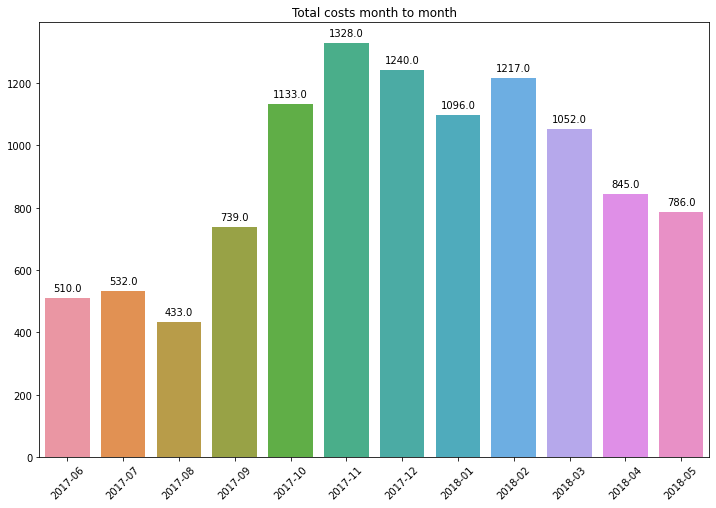

In [35]:
# Visualize the number of people using the product each day of the month

plt.figure(figsize=(12,8))
splot = sns.barplot(data=df_dau_monthly)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.title('Total costs month to month')
plt.show();

Findings:
* The number of people using the product every day is around 907 people.
* The number of people using the product every week is around 5724 people.
* The number of people who use the product every month is around 23228 people.
* November 2017 is the month with the highest number of people visiting Y.Afisha's web.

#### How many sessions per day? (One user may have more than one session).

In [36]:
# Look back into the table of df_visits

df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [37]:
# Grouping the table based on session_date to get the number of sessions per day

sess_per_user = df_visits.groupby('session_date').agg({'uid': ['count','nunique']})
sess_per_user.columns = ['n_sessions', 'n_users']
sess_per_user['sess_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']

sess_per_user

,n_sessions,n_users,sess_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


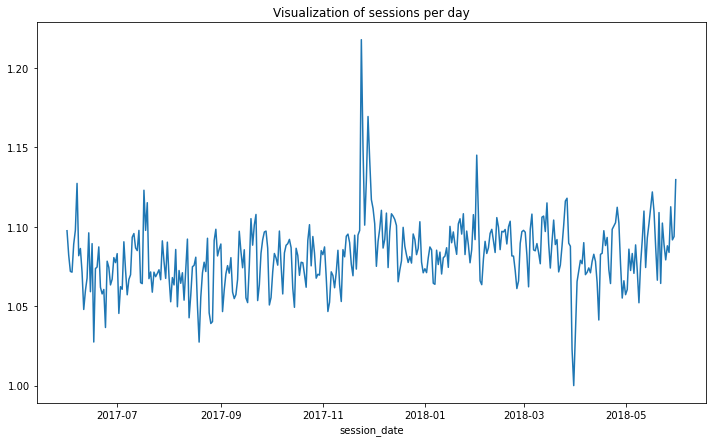

In [38]:
# Visualization of the number of sessions per day

sess_per_user['sess_per_user'].plot(kind='line', figsize=(12,7))
plt.title('Visualization of sessions per day');

In [39]:
# Look at the distribution

sess_per_user['sess_per_user'].value_counts()

1.071429    3
1.096774    2
1.081667    2
1.083333    2
1.072464    2
           ..
1.071553    1
1.055425    1
1.050767    1
1.086592    1
1.129695    1
Name: sess_per_user, Length: 357, dtype: int64

In [40]:
# Look at the distribution

sess_per_user.describe()

,n_sessions,n_users,sess_per_user
count,364.000000,364.000000,364.000000
mean,987.357143,907.991758,1.082166
std,418.985399,370.513838,0.020873
min,1.000000,1.000000,1.000000
25%,635.500000,594.000000,1.070321
50%,1003.000000,921.000000,1.082488
75%,1280.000000,1173.000000,1.093876
max,4042.000000,3319.000000,1.217837


Findings:
* The average number of sessions per user per day is about 1 time.
* The highest session is around December 2017, maybe it has something to do with marketing events around that month. Or related to the Christmas season and the end of the year.

Insights:
* We can say that 4000 visits a day is 4000 people.
* Our users only come once a day, meaning the opportunity to offer products when the session opens.

Recommendation:
* Create a push notification to encourage people to open more than one session.

#### How long is the duration for each session?

In [41]:
# Look back into the table of df_visits

df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [42]:
# Calculate the ASL metric (Average session length) to find how long is ther duration for each session

df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds

In [43]:
# Look at the distribution

df_visits.describe()

,source_id,uid,session_duration_sec
count,359398.000000,3.593980e+05,359398.000000
mean,3.750502,9.202559e+18,643.042287
std,1.917101,5.298438e+18,997.105212
min,1.000000,1.186350e+13,0.000000
25%,3.000000,4.613361e+18,120.000000
50%,4.000000,9.227413e+18,300.000000
75%,5.000000,1.372824e+19,840.000000
max,10.000000,1.844668e+19,42660.000000


In [44]:
# Look at the distribution

df_visits['session_duration_sec'].value_counts()

60       53029
0        35794
120      35748
180      26672
240      21085
         ...  
17820        1
18480        1
14340        1
23400        1
16320        1
Name: session_duration_sec, Length: 310, dtype: int64

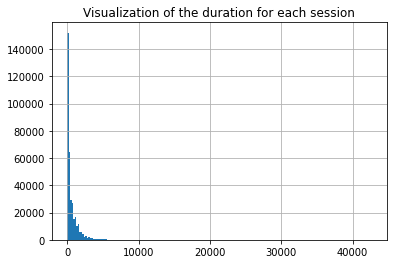

In [45]:
# Visualization

df_visits['session_duration_sec'].hist(bins=200)
plt.title('Visualization of the duration for each session');

In [46]:
# Summary

print('Average session length: {:.2f} sec'.format(df_visits['session_duration_sec'].mean()))
print('Median session length: {:.2f} sec'.format(df_visits['session_duration_sec'].median()))
print('Modus session length: {} sec'.format(df_visits['session_duration_sec'].mode()[0]))

Average session length: 643.04 sec
Median session length: 300.00 sec
Modus session length: 60 sec


Findings:
* The average duration for each session is around 643 seconds or around -+ 10 minutes.
* The median duration for each session is around 300 seconds or around -+ 5 minutes.
* The total duration mode for each session is about 60 seconds or about 1 minute.

Insight:
* We can say that duration of each session is very short, only about 1-10 minutes.

Recommendation:
* Create events such as live shopping in web with promos/discounts to encourage people to have longer sessions, so we can offer more products.

#### How often do users return to using the product?

In [47]:
# Look back into the table of df_visits

df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


In [48]:
# Get the first day each users visited the web

first_visits = df_visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid','first_sess_start_ts']


In [49]:
# Gets the first_sess per year, per month, per week, and per day and saves them to a new table

first_visits['first_sess_year'] = first_visits['first_sess_start_ts'].astype('datetime64[Y]')
first_visits['first_sess_month'] = first_visits['first_sess_start_ts'].astype('datetime64[M]')
first_visits['first_sess_week'] = first_visits['first_sess_start_ts'].astype('datetime64[W]')
first_visits['first_sess_date'] = first_visits['first_sess_start_ts'].dt.date


In [50]:
# Join table df_visits & first_visits based on column uid

vis = pd.merge(df_visits, first_visits, on ='uid')
vis.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-01-01,2018-03-01,2018-03-08,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-01-01,2018-03-01,2018-03-08,2018-03-09


In [51]:
# Calculates the distance based on days and months from the first session to the next session for each user

vis['age_days'] = (vis['session_date'] - vis['first_sess_date']).dt.days
vis['age_months'] = round(vis['age_days'] / 30,0).astype('int')

vis.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date,age_days,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-01-01,2017-12-01,2017-12-14,2017-12-20,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-01-01,2018-02-01,2018-02-15,2018-02-19,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-01-01,2018-03-01,2018-03-08,2018-03-09,72,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-01-01,2018-03-01,2018-03-08,2018-03-09,0,0


In [52]:
# Create a pivot table for session cohorts

cohorts = vis.pivot_table(
    index='first_sess_month', columns='age_months', values='uid', aggfunc='nunique')

In [53]:
# Showing the cohorts

cohorts.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
first_sess_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [58]:
# Create a function to gain retention for users who return to use the product

retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col]/cohorts[0]*100], axis=1)
retention.columns = cohorts.columns

In [59]:
# Showing the retention cohorts

retention.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
2017-06-01 00:00:00,100.0,7.202655,5.430274,5.845086,7.119692,6.388114,6.599291,5.377479,5.626367,4.970209,4.344219,3.86907,2.051437
2017-07-01 00:00:00,100.0,5.449011,5.235921,5.136986,5.837139,4.634703,4.611872,4.710807,4.010654,2.884323,2.564688,0.85997,
2017-08-01 00:00:00,100.0,6.787153,6.227286,5.66742,5.372753,4.046754,4.302131,3.339554,2.936843,2.386799,0.569689,,
2017-09-01 00:00:00,100.0,7.417385,6.687021,4.885057,4.088841,3.843391,3.418343,2.514368,2.191092,0.365182,,,
2017-10-01 00:00:00,100.0,7.152481,5.32779,3.695577,3.75332,3.029603,2.175001,1.840089,0.461947,,,,
2017-11-01 00:00:00,100.0,6.785819,4.660893,3.728714,3.302995,2.345126,1.908397,0.392689,,,,,
2017-12-01 00:00:00,100.0,4.974672,4.183157,2.845496,2.283521,1.58303,0.399715,,,,,,
2018-01-01 00:00:00,100.0,5.264321,3.66867,2.461987,1.860856,0.207744,,,,,,,
2018-02-01 00:00:00,100.0,4.680813,2.712078,1.833581,0.301843,,,,,,,,
2018-03-01 00:00:00,100.0,4.055564,2.588761,0.393414,,,,,,,,,


In [56]:
# Summary

print('On average, {0:.0%} of users come back in the following month after their first visit.'.format(retention[1].mean()))


On average, 5% of users come back in the following month after their first visit.


In [60]:
# View the average user who returns after 1 month

retention[1].mean()

5.361100820922162

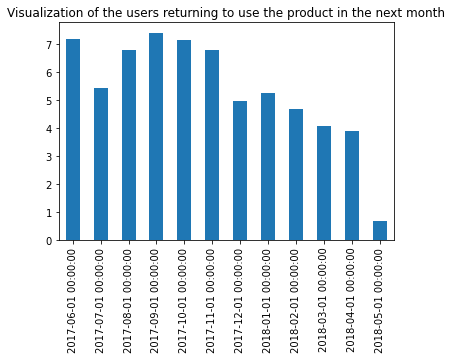

In [61]:
# Visualization

retention[1].plot(kind='bar')
plt.title('Visualization of the users returning to use the product in the next month');

Finding:
* The average user returns to the website 1 month after the first time visit is around 5%, where the September 2017 cohort was the highest at around 7.4%.
* The cohorts are look good in the first six months, e.g. the first cohort shows a return of 7.2% in the second month after first month's visit and a return of almost 100% in fifth month of 7.11%.

Insight:
* We can say that it's a good signal in terms of percentage user retention that increase in the first six months, but not in the number, because in average only 5% who returns in the following month after their first visit (e.g. first cohort: 955 users vs. 13259 users).

Recommendation:
* Create a push notification to drive people back to the web.

### Revenue

1. When did people start making purchases?
2. How many orders did they make during a given time period?
3. What is the average purchase size?
4. How much money did they contribute? (LTV)


#### When did people start making purchases?

In [62]:
# Look back into the table of df_orders

df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [63]:
# Get the first day each users makes a purchases

first_orders = df_orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid','first_order_ts']

In [64]:
# Get first_orders per month, per week, and per day and save them to a new table

first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders['first_order_week'] = first_orders['first_order_ts'].astype('datetime64[W]')
first_orders['first_order_date'] = first_orders['first_order_ts'].dt.date

first_orders.head()

,uid,first_order_ts,first_order_month,first_order_week,first_order_date
0,313578113262317,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11
3,2464366381792757,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24


In [65]:
# Look back into the table first_visits

first_visits.head()

,uid,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date
0,11863502262781,2018-03-01 17:27:00,2018-01-01,2018-03-01,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-01-01,2018-02-01,2018-02-01,2018-02-06
2,297729379853735,2017-06-07 18:47:00,2017-01-01,2017-06-01,2017-06-01,2017-06-07
3,313578113262317,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18
4,325320750514679,2017-09-30 14:29:00,2017-01-01,2017-09-01,2017-09-28,2017-09-30


In [66]:
# Join table first_orders and first_visits dan save them to a new table

first_buy = pd.merge(first_visits, first_orders, on='uid')
first_buy.head()

,uid,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date,first_order_ts,first_order_month,first_order_week,first_order_date
0,313578113262317,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-01-01,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-01-01,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-01-01,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24


In [67]:
# Get the day difference from the first visit to the time of purchase

first_buy['days_to_first_pur'] = (first_buy['first_order_date'] - first_buy['first_sess_date']).dt.days

first_buy.head()

,uid,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date,first_order_ts,first_order_month,first_order_week,first_order_date,days_to_first_pur
0,313578113262317,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03,107
1,1575281904278712,2017-06-03 10:13:00,2017-01-01,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,0
2,2429014661409475,2017-10-11 17:14:00,2017-01-01,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28,1
4,2551852515556206,2017-11-24 10:14:00,2017-01-01,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24,0


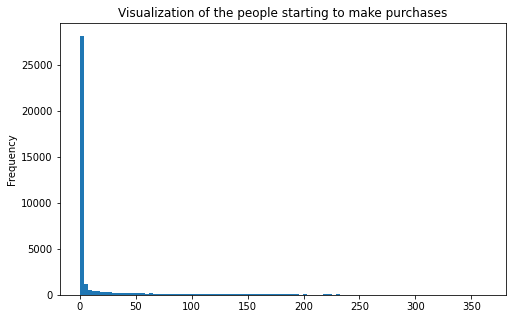

In [68]:
# Visualization

first_buy['days_to_first_pur'].plot(kind='hist', bins=100, figsize=(8,5))
plt.title('Visualization of the people starting to make purchases');

In [69]:
# Look at the distribution

first_buy['days_to_first_pur'].value_counts()

0      25039
1       1966
2        685
3        452
4        386
       ...  
343        1
282        1
318        1
353        1
358        1
Name: days_to_first_pur, Length: 349, dtype: int64

Findings:
* Mostly, users make purchases on the first day of their session (25039 users = 0 days).
* However, the longest time, there were users who made purchases after 341 days from their first session on the web.

Insights:
* Mostly, users have a purpose to shop from the first time they enter the website, so they immediately check out on their first day.

Recommendation:
* Create push notifications for users who haven't purchased in the first week after the first visit to remember them.

#### How many orders did they make during a given time period?
The period we will take from all data that is already in the df_orders table.

In [70]:
# Look back into the table of df_orders

df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [71]:
# Get the number of orders per month, per week, and per day and save them to a new table

df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_orders['order_week'] = df_orders['buy_ts'].astype('datetime64[W]')
df_orders['order_date'] = df_orders['buy_ts'].dt.date

df_orders.head()

,buy_ts,revenue,uid,order_month,order_week,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [72]:
# Grouping table df_orders based user_id 

df_orders_agg = df_orders.groupby(['uid']).agg({
    'buy_ts': 'count',
    'revenue': 'sum'
})
df_orders_agg.columns = ['count_transactions', 'sum_revenue']

df_orders_agg

,count_transactions,sum_revenue
uid,,
313578113262317,1,0.55
1575281904278712,2,3.05
2429014661409475,1,73.33
2464366381792757,1,2.44
2551852515556206,2,10.99
...,...,...
18445147675727495770,1,3.05
18445407535914413204,3,0.88
18445601152732270159,1,4.22


In [73]:
# Look at the distribution

df_orders_agg.describe()

,count_transactions,sum_revenue
count,36523.000000,36523.000000
mean,1.380363,6.901328
std,3.454461,88.128535
min,1.000000,0.000000
25%,1.000000,1.470000
50%,1.000000,3.050000
75%,1.000000,5.800000
max,239.000000,11810.180000


In [74]:
# Mengelompokkan df_orders berdasarkan user id 

df_orders_month_agg = df_orders.groupby(['order_month']).agg({
    'buy_ts': 'count',
    'revenue': 'sum'
})
df_orders_month_agg.columns = ['count_transactions', 'sum_revenue']

df_orders_month_agg

,count_transactions,sum_revenue
order_month,,
2017-06-01,2354,9557.49
2017-07-01,2363,12539.47
2017-08-01,1807,8758.78
2017-09-01,3387,18345.51
2017-10-01,5679,27987.70
2017-11-01,5659,27069.93
2017-12-01,6218,36388.60
2018-01-01,4721,19417.13
2018-02-01,5281,25560.54


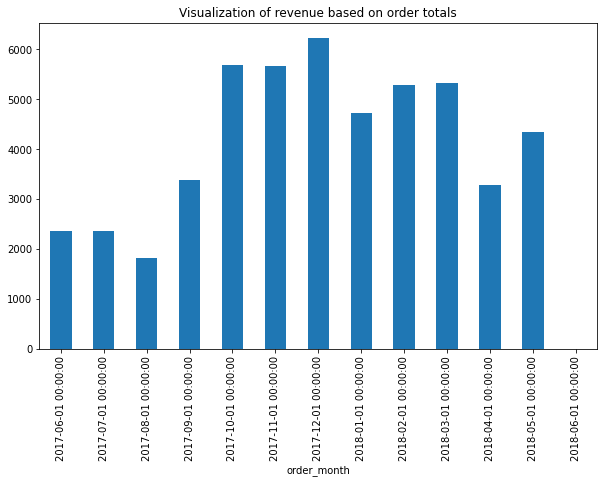

In [75]:
# Visualization with barplot

df_orders_month_agg['count_transactions'].plot(kind='bar', figsize=(10,6))
plt.title('Visualization of revenue based on order totals');

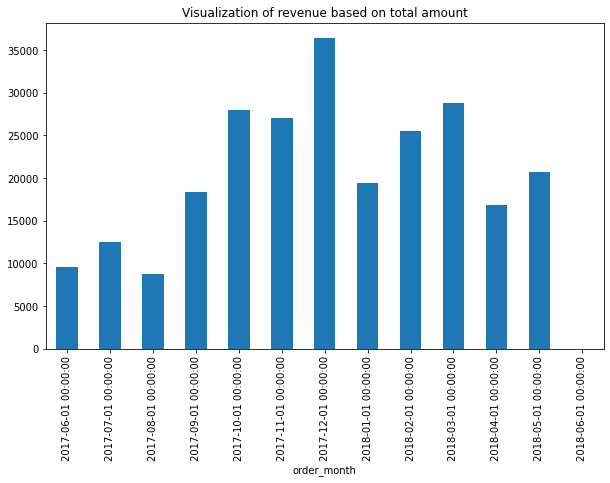

In [76]:
# Visualization with barplot

df_orders_month_agg['sum_revenue'].plot(kind='bar', figsize=(10,6))
plt.title('Visualization of revenue based on total amount');

In [77]:
# Look at the distribution

df_orders_month_agg.describe()

,count_transactions,sum_revenue
count,13.000000,13.000000
mean,3878.076923,19389.015385
std,1858.113401,9962.071481
min,1.000000,3.420000
25%,2363.000000,12539.470000
50%,4346.000000,19417.130000
75%,5326.000000,27069.930000
max,6218.000000,36388.600000


Findings:
* The highest number of orders and revenue occurred in December 2017, amounting to 6218 orders and USD 36,388 respectively.
* Meanwhile in the following month, Jan 2018, the amount of revenue was small even though the number of orders was quite a lot, namely 4721 orders and only generated revenue of USD 19,417.13.
* For June 2016 there was only 1 order, maybe this is related to the cut off data pulled for this analysis.


Insights:
* There may be a big promo in December 2017 that attracts a lot of users to visit the web and make a purchase.
* Promotions carried out in Jan 2018 were only able to attract many customers with little revenue.

Recommendations:
* Re-apply the marketing method that was carried out in December 2017.
* Meanwhile, also evaluate marketing methods in January 2018 to attract more revenue with a fairly high number of orders.

#### What is the average purchase size?

In [78]:
# Calculate the average of purchase from the table df_orders

print('Average purchase is $', round(df_orders['revenue'].mean(),2))

Average purchase is $ 5.0


In [79]:
# Look at the distribution

df_orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Findings:
* The average purchase made is USD 5, while the maximum is up to USD 2,633.

Insights:
* Perhaps most of the products purchased are products of daily necessity which are relatively cheap.

Recommendations:
* Increase the variety of products with middle to high prices, so that it has the potential to increase the average purchase.

#### How much money did they contribute? (LTV)

In [80]:
# Look back into the table of first_buy

first_buy.head()

,uid,first_sess_start_ts,first_sess_year,first_sess_month,first_sess_week,first_sess_date,first_order_ts,first_order_month,first_order_week,first_order_date,days_to_first_pur
0,313578113262317,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18,2018-01-03 21:51:00,2018-01-01,2017-12-28,2018-01-03,107
1,1575281904278712,2017-06-03 10:13:00,2017-01-01,2017-06-01,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,0
2,2429014661409475,2017-10-11 17:14:00,2017-01-01,2017-10-01,2017-10-05,2017-10-11,2017-10-11 18:33:00,2017-10-01,2017-10-05,2017-10-11,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-01,2018-01-25,2018-01-27,2018-01-28 15:54:00,2018-01-01,2018-01-25,2018-01-28,1
4,2551852515556206,2017-11-24 10:14:00,2017-01-01,2017-11-01,2017-11-23,2017-11-24,2017-11-24 10:14:00,2017-11-01,2017-11-23,2017-11-24,0


In [81]:
# Remember about buyers

cohort_sizes = first_buy.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [82]:
# Add first month

cohorts = pd.merge(df_orders, first_buy, how='inner', on='uid')
cohorts_agg = cohorts.groupby(['first_order_month',
                               'order_month']).agg({'revenue':'sum'}).reset_index()

cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [83]:
# Calculate age

cohorts_agg['age_month'] = (cohorts_agg['order_month'] - cohorts_agg['first_order_month']).dt.days
cohorts_agg['age_month'] = round(cohorts_agg['age_month'] / 30,0).astype('int')
cohorts_agg.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

cohorts_agg

,first_order_month,order_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2
75,2018-04-01,2018-04-01,10600.69,0
76,2018-04-01,2018-05-01,1209.92,1
77,2018-05-01,2018-05-01,13925.76,0


In [84]:
# Add customers and calculate LTV

cohorts_report = pd.merge(cohort_sizes, cohorts_agg, on='first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
cohorts_report

,first_order_month,n_buyers,order_month,revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [85]:
# Create a pivot table of cohorts_report

cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month', columns='age_month', values='ltv', aggfunc='sum').cumsum(axis=1)

In [86]:
# View the cohorts

cohorts_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


In [87]:
# Show the average of LTV

cohorts_ltv.describe()

age_month,0,1,2,3,4,5,6,7,8,9,10,11
count,13.000000,11.000000,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
mean,4.801682,5.395666,5.821811,6.689763,7.298634,7.969053,8.387686,9.083583,10.062084,9.251340,10.004616,11.879234
std,0.669714,0.713722,0.861552,1.939974,1.982234,2.067443,2.520771,2.644782,2.489989,1.563286,2.287861,NaN
min,3.420000,4.430394,4.513777,4.587921,4.940151,6.159956,6.244772,6.360242,8.084035,8.231180,8.386854,11.879234
25%,4.657597,5.069130,5.503285,5.888035,6.179726,6.828089,6.693064,7.922803,8.233817,8.351452,9.195735,11.879234
50%,4.738191,5.209743,5.742181,6.598270,7.197094,7.639913,7.683754,7.991533,9.364537,8.471723,10.004616,11.879234
75%,5.154683,5.651213,6.136160,6.988937,7.534691,8.010429,8.928139,9.892116,11.192803,9.761420,10.813497,11.879234
max,6.010218,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,11.051117,11.622378,11.879234


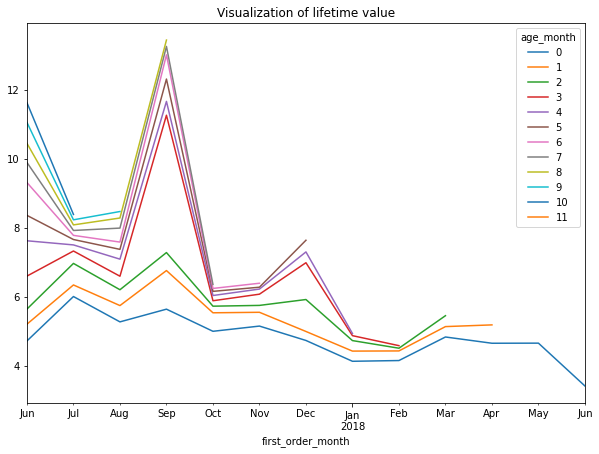

In [88]:
# Visualization

cohorts_ltv.plot(figsize=(10,7))
plt.title('Visualization of lifetime value');

Findings:
* The data above show us that the LTV cohort is very good, which the money get from customer is increase in the following month after their fisrt month.


Insight:
* Most of the customer are loyal customer.


Recommendation:
* Keep the performance, go explore of new product variants to increase revenue.

### Marketing

1. How much money was spent? Overall/per source/over time
2. What are the customer acquisition costs from each source?
3. How profitable is the investment? (ROI)

#### How much money was spent? Overall/per source/over time

In [89]:
# Look back into the table of df_costs

df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [90]:
# Calculate total costs or the entire period

print('Total costs spend for the entire period was USD',df_costs['costs'].sum())

Total costs spend for the entire period was USD 329131.62


In [91]:
# Calculate total costs per source

vis_source = df_costs.groupby('source_id').sum()['costs'].reset_index().sort_values('costs', ascending=False)
vis_source

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


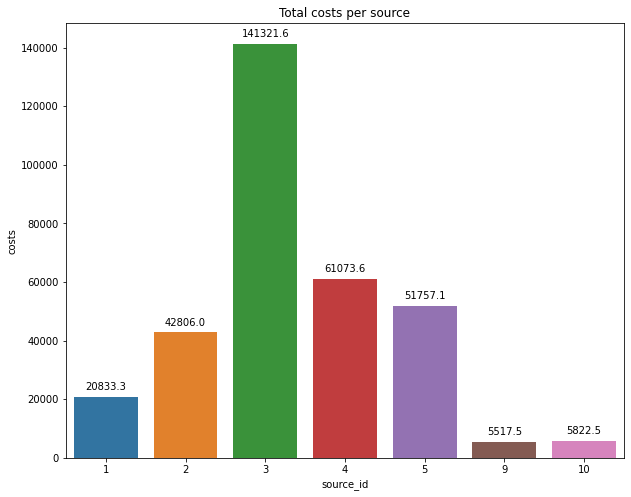

In [92]:
# Visualization with barplot total costs per source

plt.figure(figsize=(10,8))
splot = sns.barplot(data=vis_source, x='source_id', y='costs')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0,10),
                   textcoords = 'offset points')
plt.xticks
plt.title('Total costs per source')
plt.show();

In [93]:
# Add new column dt_month from column dt

df_costs['dt_month'] = df_costs['dt'].astype('datetime64[M]')
df_costs.head()

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [94]:
# Calculate total costs month to month

vis_month = df_costs.groupby(['dt_month']).sum()['costs'].reset_index()
vis_month

,dt_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


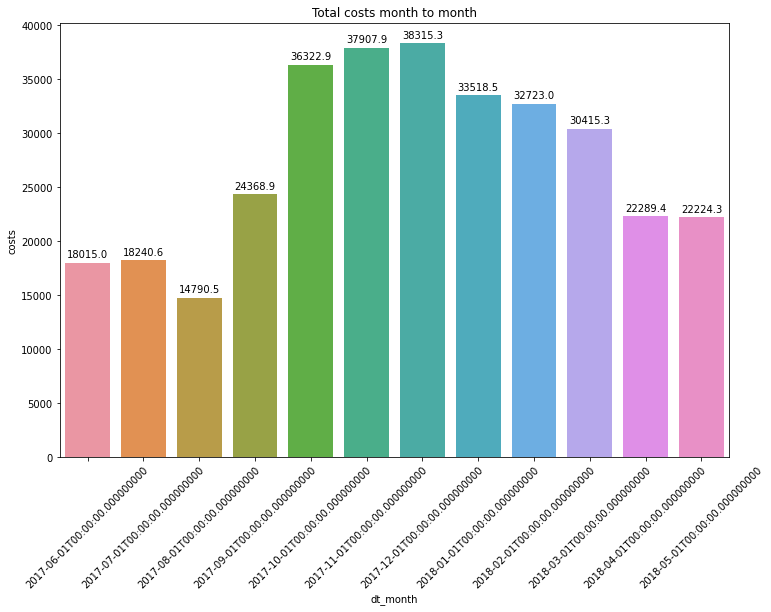

In [95]:
# Visualization with barplot total costs month to month

plt.figure(figsize=(12,8))
splot = sns.barplot(data=vis_month, x='dt_month', y='costs')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 8),
                   textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.title('Total costs month to month')
plt.show();

Findings:
* Total costs that the Marketing dept. spent for the entire period was USD 329,131.62.
* The source_id no.3 was the top of costs that the Marketing dept. spent of USD 141,321.63.
* While, in Nov'2017 was the top of month that the Marketing dept. spent cost of USD 37,907.88.

Insights:
* We can say that many people come to the web using source_id no.3 because the cost amount is very high, while source_id no.9 & 10 are the lowest people who come through that way.
* The costs incurred in Sept, Oct, Nov 2017 are the top three, maybe in those months Marketing dept. did a lot of advertising so as to increase the number of visitors.

Recommendations:
* Since, source_id no.9 & 10 are the lowest source people coming through that way, Marketing dept. can remove that option and invest in another more effective source_id.


#### What are the customer acquisition costs (CAC) from each source?

In [96]:
# Look back into the table of df_visits

df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


In [97]:
# Grouping users per source_id 

total_visits = df_visits.groupby('source_id').count()['uid'].reset_index()
total_visits

,source_id,uid
0,1,34121
1,2,47626
2,3,85609
3,4,101794
4,5,66905
5,6,6
6,7,36
7,9,13276
8,10,10025


In [98]:
# Grouping costs per source_id

total_costs = df_costs.groupby('source_id').sum()['costs'].reset_index()
total_costs

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [99]:
# Join table total_visits and total_costs
# Calculate customer acquisition costs (CAC)

total_visits = total_visits.merge(total_costs, how='left', on='source_id')
total_visits['CAC'] = total_visits['costs'] / total_visits['uid']

In [100]:
# Show table

total_visits.sort_values('CAC', ascending=True)

,source_id,uid,costs,CAC
7,9,13276,5517.49,0.415599
8,10,10025,5822.49,0.580797
3,4,101794,61073.60,0.599972
0,1,34121,20833.27,0.610570
4,5,66905,51757.10,0.773591
1,2,47626,42806.04,0.898796
2,3,85609,141321.63,1.650780
5,6,6,NaN,NaN
6,7,36,NaN,NaN


Findings:
* Source_id no.9, 10, & 4 are the top Ad source with lowest CAC (USD 0.41, 0.58 & 0.59).
* Source_id no.1 is the highest cost in customer acquisition of USD 1.65. 

Insights:
* The highest CAC does not always result in high visits to the web.
* We don't have information about marketing costs related to source_id 6 & 7. Maybe it's free, so there's no CAC that attracts visits.

Recommendations:
* Try reducing the amount of cost in source_id no.3 because the cost is very high. It's better to invest more in source_id no. 9, 10 & 4 which are cheaper but still attract more visits.

####  How profitable is the investment? (ROI)
- We have to know the cost of each source
- We have to know which session the revenue is in
- Calculate the total revenue per source_id
- Calculate the ROI = Revenue per source / cost per source

In [101]:
# Look back into the table of df_costs

df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


In [102]:
# Look back into the table of df_orders

df_orders.head()

,buy_ts,revenue,uid,order_month,order_week,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [103]:
# Get date from column end_date on the table df_Visits

df_visits['end_date'] = df_visits['end_ts'].dt.date
df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,end_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27


In [104]:
# Rename column session_date into start_date

df_visits = df_visits.rename(columns={"session_date": "start_date"})
df_visits.head()    

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,start_date,session_duration_sec,end_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27


In [105]:
# Check the shape of the two tables

df_visits.shape, df_orders.shape

((359398, 11), (50415, 6))

In [106]:
# Join the two tables
# Check the shape of the new table visits_orders

visits_orders = df_orders.merge(df_visits, how='left', left_on=['uid', 'order_date'], right_on=['uid', 'start_date'])
visits_orders.shape

(63683, 16)

In [107]:
# Filter the data from anomali data (buy_ts lebih besar dari end_ts)

visits_orders = visits_orders.loc[(visits_orders['buy_ts'] >= visits_orders['start_ts']) & (
    visits_orders['buy_ts'] <= visits_orders['end_ts'])]
visits_orders.shape

(35742, 16)

In [108]:
# Create a new table of total_income

total_income = visits_orders.groupby('source_id').sum()['revenue'].reset_index()
total_income

,source_id,revenue
0,1.0,28595.14
1,2.0,33517.50
2,3.0,30276.50
3,4.0,34390.76
4,5.0,33581.31
5,7.0,1.22
6,9.0,2746.67
7,10.0,3079.24


In [109]:
# Merge table

total_visits = total_visits.merge(total_income, how='left', on='source_id')
total_visits

,source_id,uid,costs,CAC,revenue
0,1,34121,20833.27,0.610570,28595.14
1,2,47626,42806.04,0.898796,33517.50
2,3,85609,141321.63,1.650780,30276.50
3,4,101794,61073.60,0.599972,34390.76
4,5,66905,51757.10,0.773591,33581.31
5,6,6,NaN,NaN,NaN
6,7,36,NaN,NaN,1.22
7,9,13276,5517.49,0.415599,2746.67
8,10,10025,5822.49,0.580797,3079.24


In [110]:
# Calculate ROI (return on investment)

total_visits['ROI'] = total_visits['revenue'] / total_visits['costs']

In [111]:
# Show table of total_visits

total_visits.sort_values('ROI', ascending=False)

,source_id,uid,costs,CAC,revenue,ROI
0,1,34121,20833.27,0.610570,28595.14,1.372571
1,2,47626,42806.04,0.898796,33517.50,0.783009
4,5,66905,51757.10,0.773591,33581.31,0.648825
3,4,101794,61073.60,0.599972,34390.76,0.563104
8,10,10025,5822.49,0.580797,3079.24,0.528853
7,9,13276,5517.49,0.415599,2746.67,0.497812
2,3,85609,141321.63,1.650780,30276.50,0.214238
5,6,6,NaN,NaN,NaN,NaN
6,7,36,NaN,NaN,1.22,NaN


Finding:
* Only one source_id which is no.1 that drive positive ROI of 1.37.


Insight:
* Although source_id no.9 has the lowest CAC, but doesn't drive high revenue, even losing 0.21 ROI. Because the income is only a little.


Recommendation:
* Try excluding source_id no.3 as the cost is very high and the ROI is lower. It's like getting a double jackpot to lose.


## Overall Conclusion

* **In the data pre-processing section:**
    1. From the initial data exploration, we find that of the three DataFrames, the data size has been optimized by ensuring that the data type is appropriate.
    2. The column names in the df_1 visits and df_2 orders tables are not quite right because they don't match the writing
    3. style of snake_case. So we have fixed the column names of the two tables.
    4. There are no missing values.
    5. There are no duplicate data.


* **In the Exploratory Data Analysis (EDA) section:**


* Product
    1. First of all, the number of people using the product every day is around 907 people, while per week is around 5724 people and per month is around 23228 people.
    2. Furthermore, the average number of sessions per user per day is about 1 time. Then, we can say that 4000 visits a day is 4000 people. Our users only come once a day, meaning the opportunity to offer products when the session opens.
    3. While, the average duration for each session is around 643 seconds or around 10 minutes, with median duration around -+ 5 minutes, and the lowest session is about 1 minute. It's very short time.
    4. The average user returns to the website 1 month after the first time visit is around 5%, where the September 2017 cohort was the highest at around 7.4%.
    5. The retention cohorts are look good in the first six months, e.g. the first cohort shows a return of 7.2% in the second month after first month's visit and a return of almost 100% in fifth month of 7.11%.
    6. We can say that it's a good signal in terms of percentage user retention that increase in the first six months, but not in the number, because in average only 5% who returns in the following month after their first visit (e.g. first cohort: 955 users vs. 13259 users).


* Revenue
    1. Mostly, users make purchases on the first day of their session (25039 users = 0 days), means, they have a purpose to shop from the first time they enter the website, so they immediately check out on their first day. However, the longest time, there were users who made purchases after 341 days from their first session on the web.
    2. The highest number of orders and revenue occurred in December 2017, amounting to 6218 orders and USD 36,388 respectively. Meanwhile in the following month, Jan 2018, the amount of revenue was small even though the number of orders was quite a lot, namely 4721 orders and only generated revenue of USD 19,417.13.
    3. Furthermore, the average purchase made is USD 5, while the maximum is up to USD 2,633. Perhaps most of the products purchased are products of daily necessity which are relatively cheap.
    4. The LTV cohort is very good, which the money get from customer is increase in the following month after their fisrt month.


* Marketing
    1. Total costs that the Marketing dept. spent for the entire period was USD 329,131.62 The source_id no.3 was the top of costs that the Marketing dept. spent of USD 141,321.63, while source_id no.9 & 10 are the lowest people who come through that way. While, in Nov'2017 was the top of month that the Marketing dept. spent cost of USD 37,907.88.
    2. Source_id no.9, 10, & 4 are the top Ad source with lowest CAC (USD 0.41, 0.58 & 0.59). While, source_id no.1 is the highest cost in customer acquisition of USD 1.65.
    3. Only one source_id which is no.1 that drive positive ROI of 1.37. Also, even though source_id no.9 has the lowest CAC, but doesn't drive high revenue, even losing 0.21 ROI. Because the income is only a little.
    
    

* **Overall Recommendations:**
    1. Create a push notification with purposes of:
        * Encourage people to open more than one session, because according to our data the average number of sessions per user per day is about 1 time.
        * Drive people back to the web, because according to our data the average only 5% of users return in the following month after their first visit.
        * For users who haven't purchased in the first week after the first visit to remember them.
    2. Create events such as live shopping in web with promos/discounts to encourage people to have longer sessions, so we can offer more products.
    3. Re-apply the marketing method that was carried out in December 2017, because the highest number of orders and revenue occurred in that month. Meanwhile, also evaluate marketing methods in January 2018 to attract more revenue with a fairly high number of orders.
    4. Since our average purchase made is about USD 5, thus increase the variety of products with middle to high prices, so that it has the potential to increase the average purchase.
    5. Try reducing the amount of cost in source_id no.3 because the cost is very high. It's better to invest more in source_id no. 9, 10 & 4 which are cheaper but still attract more visits.
    6. Try excluding source_id no.3 as the CAC is very high and the ROI is lower. It's like getting a double jackpot to lose.